<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/Unsupervised%20Learning_02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author's Notes

As of May 2021, there is no support for XGBoost on Mac (using M1 chip). You will encounter an error when training a model using XGBoost, but Logistic Regression, Random Forests, and LightGB will work successfully.

To improve the user experience, I have commented out code blocks related to XGBoost. To uncomment the code blocks, highlight the code and use the "CTRL" + "/" key combination.

If you have any issues or suggestions, please email me at ankur@unsupervisedlearningbook.com.

From [Hands-on Unsupervised Learning using Python](https://amzn.to/2tVABNx) - Chapter 2 - End-to-End Machine Learning Project

# Google Colab Setup
**Only for users on Google Colab**

In [1]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

In [2]:
# Connect to Google Drive
connectDrive()

Mounted at /content/drive


In [10]:
# Change path
changeDirectory("/content/drive/MyDrive/2025_Fall_텍스트영상처리/handson-unsupervised-learning-master/")

Original path:  /content/drive/MyDrive/2025_Fall_텍스트영상처리/handson-unsupervised-learning-master
New path:  /content/drive/MyDrive/2025_Fall_텍스트영상처리/handson-unsupervised-learning-master


# Import Libraries

In [4]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
import lightgbm as lgb

# Data Preparation

In [20]:
# Acquire Data
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.txt'])
data = pd.read_csv(current_path + file)

In [21]:
# Explore Data
data.shape

(284807, 31)

In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [27]:
nanCounter = np.isnan(data).sum()

In [28]:
nanCounter

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [29]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [30]:
distinctCounter

,0
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


In [31]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [56]:
dataX_1 = data.copy().drop(['Class'],axis=1)

In [57]:
dataX_1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [32]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [33]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [34]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.23
V2,-0.01,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.53
V3,-0.42,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.21
V4,-0.11,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.1
V5,0.17,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.39
V6,-0.06,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.22
V7,0.08,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.4
V8,-0.04,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.1
V9,-0.01,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.04


In [35]:
correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
correlationMatrix.to_csv(current_path+correlation_file)

/tmp/ipython-input-4104198586.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'],sort=True).sort_index()


Text(0, 0.5, 'Frequency Percentage')

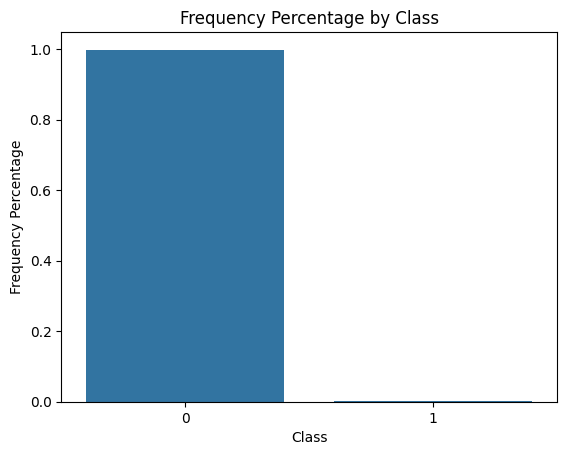

In [36]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(data))[0],tuple(count_classes/len(data))[1]])
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

# Model Preparation

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataX,
                                    dataY, test_size=0.33,
                                    random_state=2018, stratify=dataY)

In [38]:
len(X_train)

190820

In [39]:
len(X_test)

93987

In [40]:
y_train.sum()/len(y_train)

np.float64(0.0017293784718582959)

In [42]:
y_test.sum()/len(y_test)

np.float64(0.0017236426314277506)

In [43]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [44]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [45]:
# Suppress warnings
pd.set_option('mode.chained_assignment', None)

sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

In [ ]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,0.000169,-0.001847,-0.002083,0.000909,0.002961,0.002817,-0.000048,-0.002589,-0.000516,0.000787,0.000403,-0.001410,-0.000012,0.000702,0.000038,0.000596,0.001182,0.002464,0.000574,-0.000925,0.001924,-0.000187,0.001501,-0.000785,0.000352,-0.000369,0.000434,0.000083,88.324359
StDev,1.965201,1.656922,1.513847,1.414958,1.385615,1.337316,1.244564,1.216633,1.097482,1.085226,1.019253,0.994948,0.995768,0.955115,0.916130,0.874185,0.842864,0.836401,0.815053,0.769595,0.752358,0.727151,0.626533,0.606504,0.522020,0.481376,0.402544,0.340144,246.692699


In [46]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

# Logistic Regression

In [47]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C,
            class_weight=class_weight, random_state=random_state,
                            solver=solver, n_jobs=n_jobs)

In [48]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold,
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

loglossLogisticRegression = log_loss(y_train,
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

/tmp/ipython-input-2035348296.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ,y_train.ravel()):


Training Log Loss:  0.10963348648221984
CV Log Loss:  0.10881318045242476
Training Log Loss:  0.10467017186347374
CV Log Loss:  0.1040513399728834
Training Log Loss:  0.11568098161120526
CV Log Loss:  0.11808434876607175
Training Log Loss:  0.11582236510339845
CV Log Loss:  0.11829422653382964
Training Log Loss:  0.09722500465065206
CV Log Loss:  0.09708574786788696
Logistic Regression Log Loss:  0.10926576871861932


In [49]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

In [50]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

In [51]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.74')

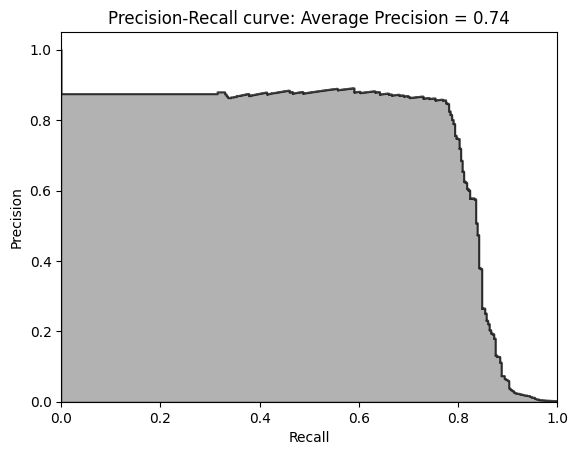

In [52]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [53]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [54]:
areaUnderROC = auc(fpr, tpr)

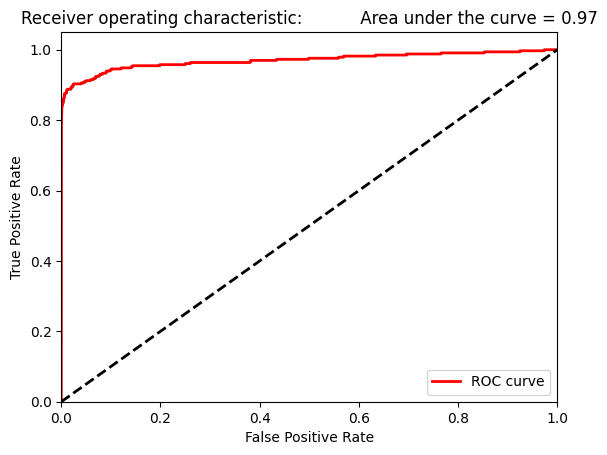

In [55]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Random Forests

In [72]:
n_estimators = 10
max_features = 'sqrt'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators,
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,
        class_weight=class_weight)

In [73]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

# Define the model with the corrected parameter
n_estimators = 10
max_features = 'sqrt'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

model = RandomForestClassifier(n_estimators=n_estimators,
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,
        class_weight=class_weight)


for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

loglossRandomForestsClassifier = log_loss(y_train,
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

/tmp/ipython-input-2688001696.py:30: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel()):


Training Log Loss:  0.0004566021382939061
CV Log Loss:  0.009445184300497334
Training Log Loss:  0.00040829452152382496
CV Log Loss:  0.013138698546690858
Training Log Loss:  0.0003885344143032627
CV Log Loss:  0.0112432800420569
Training Log Loss:  0.0003910895192488638
CV Log Loss:  0.006854581867693725
Training Log Loss:  0.00042118560357489436
CV Log Loss:  0.014015890608317228
Random Forests Log Loss:  0.010939527073051208


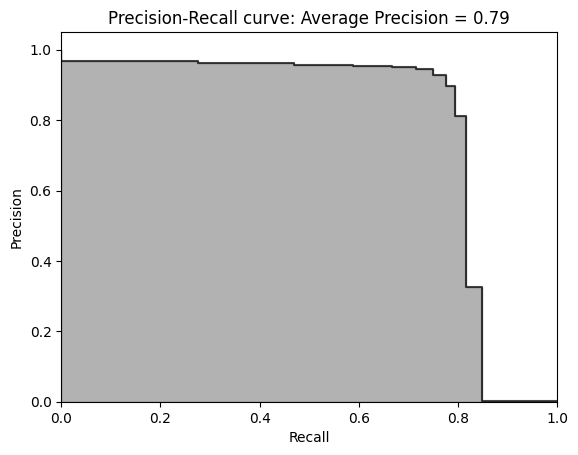

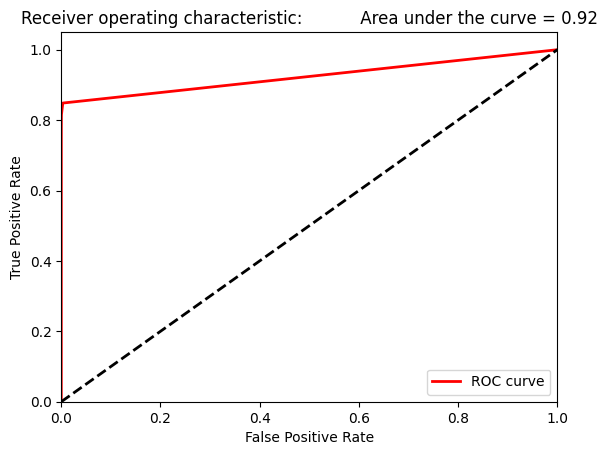

In [74]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# XGBoost

To improve the user experience, I have commented out code blocks related to XGBoost. To uncomment the code blocks, highlight the code and use the "CTRL" + "/" key combination.

In [78]:
params_xGB = {
    'nthread':16, #number of cores
    'learning_rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, #range 1 to infinity, default 6
    'min_child_weight': 1, #range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, #range 0 to 1, default 1
        # subsample ratio of features
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [79]:
import xgboost as xgb

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]

    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)

    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000,
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)

    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)

    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

/tmp/ipython-input-304858413.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel()):
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:209: UserWarning: [00:44:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:44:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:44:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:45:00] WARNING: /workspace/src/learner.cc:

[0]	train-logloss:0.08592+0.00332	test-logloss:0.08653+0.00891
[50]	train-logloss:0.10743+0.02021	test-logloss:0.11690+0.02374
[100]	train-logloss:0.10075+0.04391	test-logloss:0.10591+0.04160
[150]	train-logloss:0.10265+0.04569	test-logloss:0.10670+0.04321
[200]	train-logloss:0.10228+0.04643	test-logloss:0.10594+0.04457


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:45:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Log Loss:  0.04420695343848209
CV Log Loss:  0.106729436631312


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:209: UserWarning: [00:45:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:45:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:45:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:45:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


[0]	train-logloss:0.08693+0.00185	test-logloss:0.08650+0.00783
[50]	train-logloss:0.15529+0.15148	test-logloss:0.16245+0.16940
[100]	train-logloss:0.16661+0.14652	test-logloss:0.17959+0.16228
[150]	train-logloss:0.16603+0.14685	test-logloss:0.17966+0.16220
[200]	train-logloss:0.16681+0.14654	test-logloss:0.17803+0.16253
[201]	train-logloss:0.16676+0.14654	test-logloss:0.17752+0.16283


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:46:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Log Loss:  0.04447859429461188
CV Log Loss:  0.08132004778335995


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:209: UserWarning: [00:46:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:46:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:46:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:46:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:46:51] WARNING: /workspace/src/learner.cc:73

[0]	train-logloss:0.08425+0.00073	test-logloss:0.08442+0.00947
[50]	train-logloss:0.05833+0.02677	test-logloss:0.06449+0.03045
[100]	train-logloss:0.06375+0.03365	test-logloss:0.07256+0.03236
[150]	train-logloss:0.06519+0.03555	test-logloss:0.07641+0.03697
[200]	train-logloss:0.06384+0.03523	test-logloss:0.07406+0.03293
[201]	train-logloss:0.06407+0.03535	test-logloss:0.07484+0.03391


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:47:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Log Loss:  0.04516773215467522
CV Log Loss:  0.11369601301980238


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:209: UserWarning: [00:47:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:47:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:47:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:47:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


[0]	train-logloss:0.08437+0.00174	test-logloss:0.08449+0.00448
[50]	train-logloss:0.49357+0.68057	test-logloss:0.50331+0.70445
[100]	train-logloss:0.48299+0.68648	test-logloss:0.49451+0.70904
[150]	train-logloss:0.48413+0.68588	test-logloss:0.49565+0.70838
[200]	train-logloss:0.48169+0.68734	test-logloss:0.49564+0.70835
[218]	train-logloss:0.47662+0.69032	test-logloss:0.48983+0.71162


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:48:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Log Loss:  0.0016435184121314883
CV Log Loss:  0.0048499995439094225


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:209: UserWarning: [00:48:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:48:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:48:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:48:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:215: UserWarning: [00:48:37] WARNING: /workspace/src/learner.cc:73

[0]	train-logloss:0.08746+0.00135	test-logloss:0.08774+0.00699
[50]	train-logloss:0.11583+0.13195	test-logloss:0.11824+0.13304
[100]	train-logloss:0.11384+0.13382	test-logloss:0.12055+0.13337
[150]	train-logloss:0.11429+0.13456	test-logloss:0.12402+0.13278
[200]	train-logloss:0.10726+0.13682	test-logloss:0.11540+0.13423
[201]	train-logloss:0.10773+0.13677	test-logloss:0.11629+0.13409


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Log Loss:  0.043676419478776776
CV Log Loss:  0.09484109905166946
XGBoost Gradient Boosting Log Loss:  0.08028731920601065


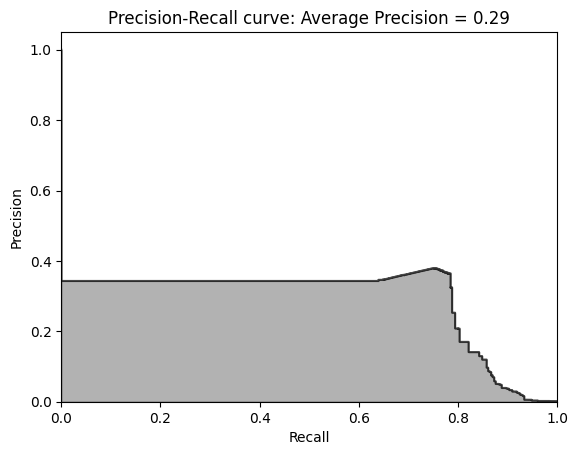

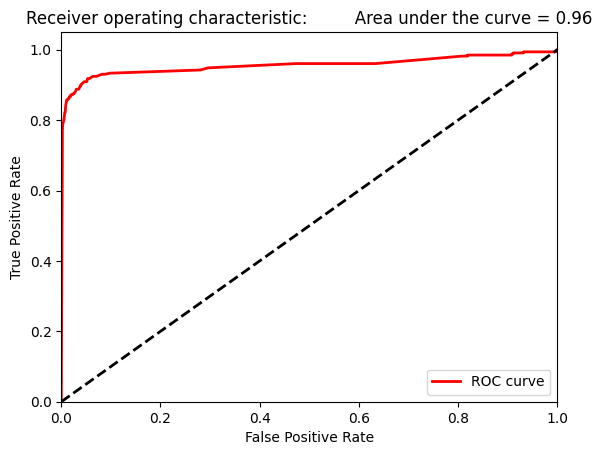

In [80]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# LightGBM

In [ ]:
params_lightGB = {
    'task': 'train',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': -1,
    'num_threads':16
}

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]

    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)

    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00626392
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00619722
[3]	valid_0's binary_logloss: 0.00612709
[4]	valid_0's binary_logloss: 0.00607428
[5]	valid_0's binary_logloss: 0.0060139
[6]	valid_0's binary_logloss: 0.005965
[7]	valid_0's binary_logloss: 0.00591106
[8]	valid_0's binary_logloss: 0.00585687
[9]	valid_0's binary_logloss: 0.00580189
[10]	valid_0's binary_logloss: 0.00575339
[11]	valid_0's binary_logloss: 0.00570291
[12]	valid_0's binary_logloss: 0.00565458
[13]	valid_0's binary_logloss: 0.00560416
[14]	valid_0's binary_logloss: 0.00555768
[15]	valid_0's binary_logloss: 0.00551172
[16]	valid_0's binary_logloss: 0.00546648
[17]	valid_0's binary_logloss: 0.00542383
[18]	valid_0's binary_logloss: 0.00538608
[19]	valid_0's binary_logloss: 0.00534511
[20]	valid_0's binary_logloss: 0.00530607
[21]	valid_0's binary_logloss: 0.00526582
[22]	valid_0's binary_logloss: 0.00522774
[23]	valid_0's binary_log

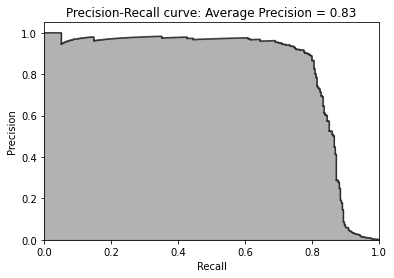

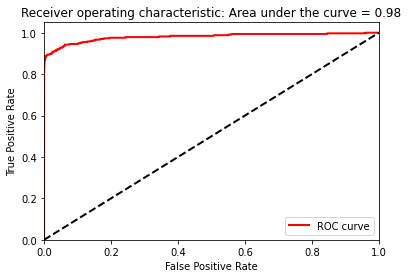

In [ ]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Test Set Evaluation

In [ ]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [ ]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [ ]:
# predictionsTestSetXGBoostGradientBoosting = \
#     pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
# dtest = xgb.DMatrix(data=X_test)
# predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
#     bst.predict(dtest)
# logLossTestSetXGBoostGradientBoosting = \
#     log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [ ]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [ ]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
# print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
#           logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.09686247466781985
Log Loss of Random Forests on Test Set:  0.009037864825132656
Log Loss of LightGBM Gradient Boosting on Test Set:  0.002538541967525037


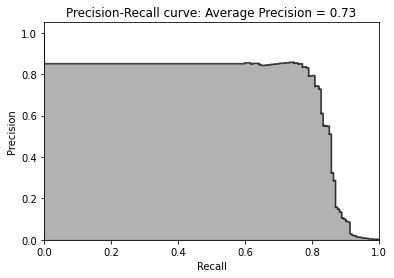

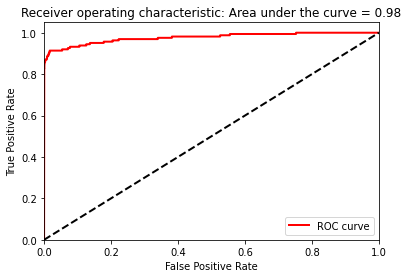

In [ ]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

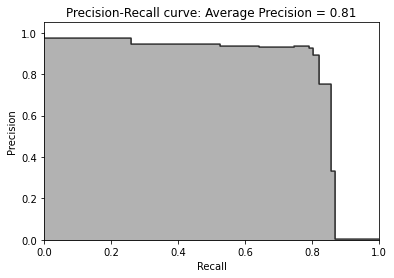

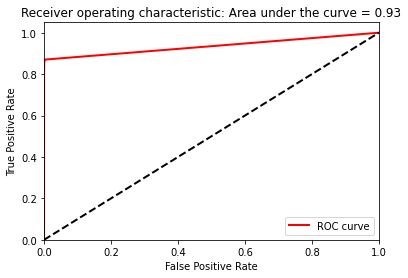

In [ ]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
# precision, recall, thresholds = \
#     precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
# average_precision = \
#     average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

# plt.step(recall, precision, color='k', alpha=0.7, where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

# plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
#           average_precision))

# fpr, tpr, thresholds = \
#     roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
# areaUnderROC = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
# plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic: \
# Area under the curve = {0:0.2f}'.format(areaUnderROC))
# plt.legend(loc="lower right")
# plt.show()

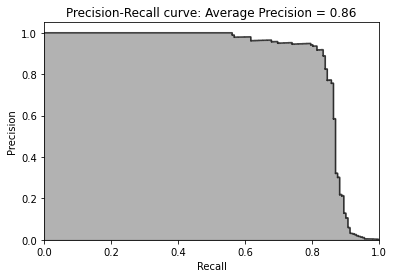

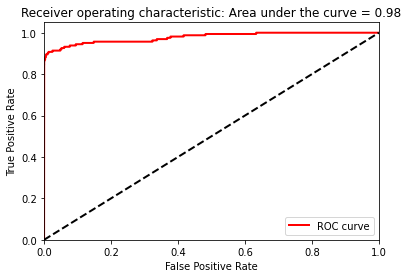

In [ ]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Ensemble

In [ ]:
# Without XGBoost
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsLightGBM']

# predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
# predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
#     predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
#     how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
#     .astype(float),how='left',rsuffix="2").join( \
#     predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
#     how='left',rsuffix="3").join( \
#     predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
#     how='left',rsuffix="4")
# predictionsBasedOnKFoldsFourModels.columns = \
#     ['predsLR','predsRF','predsXGB','predsLightGBM']

In [ ]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

In [ ]:
params_lightGB = {
    'task': 'train',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': -1,
    'num_threads':16
}

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)

    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00575886
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00567831
[3]	valid_0's binary_logloss: 0.00560729
[4]	valid_0's binary_logloss: 0.00554732
[5]	valid_0's binary_logloss: 0.00549666
[6]	valid_0's binary_logloss: 0.00543655
[7]	valid_0's binary_logloss: 0.00538611
[8]	valid_0's binary_logloss: 0.00533869
[9]	valid_0's binary_logloss: 0.00528248
[10]	valid_0's binary_logloss: 0.00524013
[11]	valid_0's binary_logloss: 0.00519067
[12]	valid_0's binary_logloss: 0.00514459
[13]	valid_0's binary_logloss: 0.00509982
[14]	valid_0's binary_logloss: 0.00506104
[15]	valid_0's binary_logloss: 0.00501864
[16]	valid_0's binary_logloss: 0.00497562
[17]	valid_0's binary_logloss: 0.00493932
[18]	valid_0's binary_logloss: 0.00490112
[19]	valid_0's binary_logloss: 0.00486511
[20]	valid_0's binary_logloss: 0.00482876
[21]	valid_0's binary_logloss: 0.004794
[22]	valid_0's binary_logloss: 0.00475979
[23]	valid_0's binary_lo

In [ ]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [127, 118, 64, 129, 165, 61, 68, 119, 180, 91, 182, 99, 168, 169, 362, 43, 177, 37, 67, 323, 95, 86, 146, 42, 171, 213, 248, 95, 110, 438, 186, 152, 427]


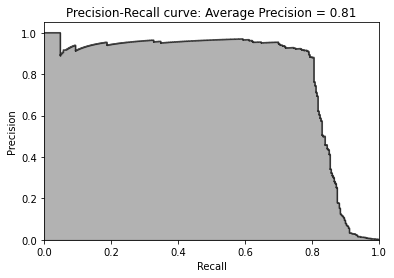

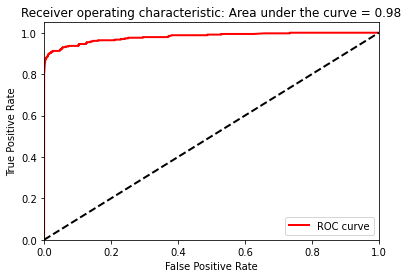

In [ ]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

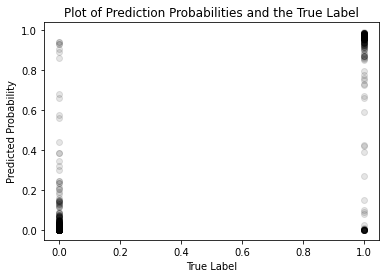

In [ ]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k',
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

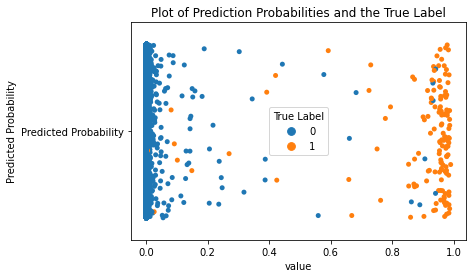

In [ ]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [ ]:
# Pipeline for New Data
# first, import new data into a dataframe called 'newData'
# second, scale data
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# third, predict using LightGBM
# gbm.predict(newData, num_iteration=gbm.best_iteration)

# Conclusion